# Transposition, a bio-inspired operator

In [1]:
from evol_algorithm import *
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
trans = transposition(flank_size=3)

i1 = [1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,0,0,1,1]
i2 = [1,1,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0]

a, b = trans(i1, i2)
print('',i1,'\n',a)
print('',i2,'\n',b)

rnd_index 14
flanking [0, 0, 1]
end indiv_1:  19
start indiv_2:  7
indiv1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
indiv2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
f2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
f2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
trasposizione in corso
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]
f2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
trasposizione in corso
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
f2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
trasposizione in corso
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
f2:	 [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0]
trasposizione in corso
f1:	 [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
x = [1,2,3,4,5]
y = [6,7,8,9,0]

x[0] = y[0]
x

[6, 2, 3, 4, 5]

## Functions

In [2]:
def deJong(indiv):
    """
    quartic = DeJong 1
    domain = [-5.12; 5.12]
    minimum 0 at (0,....,0)
    """
    y = sum([ x**2 for x in indiv])
    return y

def rosenbrock(indiv):
    """
    quartic = DeJong 2
    domain = [-2.048; 2.048]
    minimum 0 at (1,....,1)
    """
#    y = sum([ (1 - x)**2 + 100*(???) for i,x in enumerate(indiv)])
# BISOGNA CAPIRE COME SCRIVERE X_i+1
    return y

def rastrigin(indiv):
    """
    rastrigin function
    domain = [-5.12, 5.12]
    minimum at (0,....,0)
    """
    n = len(indiv)
    A = 10
    return A * n + sum([x**2 - A * math.cos(2 * math.pi * x) for x in indiv])
    
def schwefel(indiv):    
    """
    schwefel function
    domain = [-500; 500]
    minimum at (420.9687,...,420.9687)
    """
    y = sum([-x * math.sin(math.sqrt(math.fabs(x))) for x in indiv])
    return y

def quartic(indiv):
    """
    quartic = DeJong 4
    domain = [-1.28; 1.28]
    minimum 0 at x = 0
    """
    y = sum([ (i+1) * x for i,x in enumerate(indiv)]) + random.uniform(0,1)
    return y

In [3]:
#def merito_r(indiv, dim, prec):
#    return rastrigin(phenotype(indiv, dim, prec))

def fit_rastrigin(dim, prec):
    def rastrigin(indiv):
        X = phenotype(indiv, dim, prec)
        n = len(X)
        A = 10
        return A * n + sum([x**2 - A * math.cos(2 * math.pi * x) for x in X])
    return rastrigin

def fit_schwefel(dim, prec):
    def schwefel(indiv):    
        X = phenotype(indiv, dim, prec)
        y = 420.968746*dim + sum([-x * math.sin(math.sqrt(math.fabs(x))) for x in X])
        return y
    return schwefel

def fit_dejong(dim,prec):
    def dejong(indiv):
        X = phenotype(indiv, dim, prec)
        n = len(X)
        return sum([ x**2 for x in X])
    return dejong

## Define parameters

In [42]:
numb_generations = 50
size_pop = 1000
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.02 

dimensions = 10
max_domain = 5.12
precision = 4

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)

In [90]:
best_sea = sea(numb_generations, size_pop, size_cromo, prob_mut, prob_cross, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)
print(best_sea[1])
print(phenotype(best_sea[0], dimensions, precision))

11.11332241754792
[0.9855, 1.024, 0.9471, 1.9904, -0.0128, 0.9952, -0.0256, 0.9631, 1.024, 0.0]


In [88]:
numb_generations = 300
size_pop = 250
prob_mut = 0.01
prob_cross = 0.7
tour_size = 3
elite_percent = 0.03

dimensions = 3
max_domain = 500
precision = 1

# we define here all the function problem dependent so we don't need to modify the evolutionary algorithm
size_cromo = cromo_len(max_domain, precision)
recombination = uniform_cross(prob_cross, max_domain, precision, dimensions)
mutation = muta_bin(max_domain, dimensions, precision)
pop = gera_pop(max_domain, precision, dimensions)
best_schwefel = sea(numb_generations, size_pop, size_cromo, prob_mut, prob_cross, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_schwefel(dimensions, precision), pop)
print(best_schwefel[1])
print(phenotype(best_schwefel[0], dimensions, precision))
print(best_schwefel)

6.225413082952855
[420.7, 422.4, 421.0]


In [43]:
best_sea_for_plot = sea_for_plot(numb_generations, size_pop, size_cromo, prob_mut, prob_cross, tour_sel(tour_size),
               recombination, mutation, sel_survivors_elite(elite_percent), fit_rastrigin(dimensions, precision), pop)

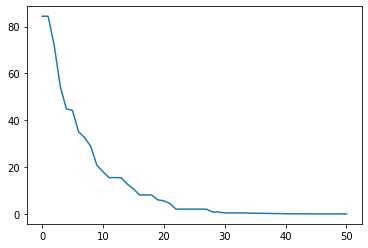

In [44]:
plt.plot(best_sea_for_plot[1])

In [45]:
best_sea_for_plot[0]

([1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 0.0008233249353395422)